# Lab of computational physics - EXR08

#### Barone Francesco Pio, AY 2021/22 UniPD

In [1]:
# I will place the files for this notebook in a dedicated subdirectory
%cd ./08data

# general imports
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import optimize
from scipy import stats

/home/baronefr/Documents/lab_local/08data


#### 1. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

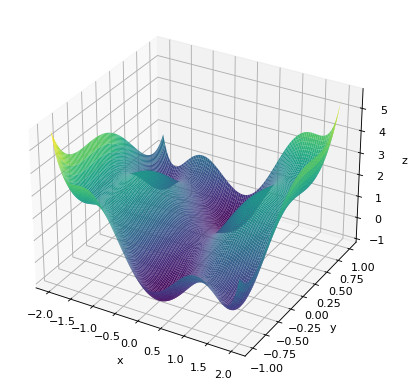

In [2]:
# the function to optimize
def f(x, y): return ((4-2.1*(x**2) + (x**4)/3)*(x**2) + x*y + 4*(y*y-1)*(y**2))
def f_opti(X): return f(X[0],X[1]) # f redefined as requested by the optimizator

# plotting the function in 3D, just to give it a look:
x = np.linspace(-2, 2, 100); y = np.linspace(-1, 1, 100);
X, Y = np.meshgrid(x, y); Z = f(X, Y);

fig = plt.figure(figsize=(6, 7), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.contour3D(X, Y, Z, 70)    # to plot a countour
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

guess (-1, 0.9), then found minimum at [-0.08984201  0.71265688] with value -1.0316284534879985
guess (1, -0.9), then found minimum at [ 0.089842   -0.71265689] with value -1.0316284534879132


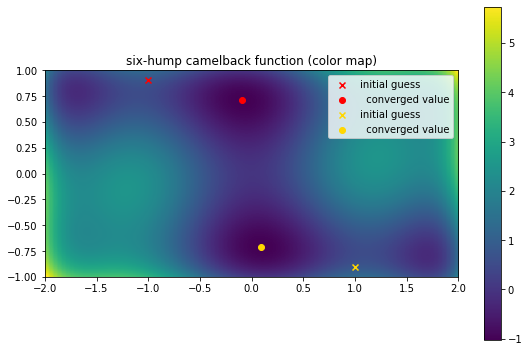

In [3]:
guesses, minimums = [], []

# restricting to upper quadrants ( y > 0.1)
bounds, x0  = [(-2,2),(0.1,1)], (-1, 0.9)
optimal = optimize.minimize(f_opti, x0, bounds=bounds)
guesses.append(x0); minimums.append(optimal.x);

# restricting to lower quadrants ( y < - 0.1)
bounds, x0  = [(-2,2),(-1,-0.1)], (1, -0.9)
optimal = optimize.minimize(f_opti, x0, bounds=bounds)
guesses.append(x0); minimums.append(optimal.x);

######################### plotting #########################

# function plot
plt.figure(figsize=(8, 5))
plt.imshow(f(X, Y), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
plt.title('six-hump camelback function (color map)')

# minimum plot
colors = ['r' , 'gold' ]
for idx, x0 in enumerate(guesses):
    mm = minimums[idx]
    print( f'guess {x0}, then found minimum at {mm} with value {f_opti(mm)}')
    plt.scatter(x0[0], x0[1], color= colors[idx], marker = 'x', label = 'initial guess')
    plt.scatter(mm[0], mm[1], color= colors[idx], label = '  converged value')

plt.tight_layout()
plt.legend()
plt.show()

This function has two global minimums with value -1.03162 in points $x_1 = (-0.08984201, 0.71265688)$ and $x_2 = -x_1$. To find those values I used the scipy optimize.minimize() function with bounds restricted to $y>0.1$ and $-y>0.1$. 

If the initial guess is set to the origin $x_0 = (0,0)$, the optimization is stuck at such point, as can be seen in the following section.

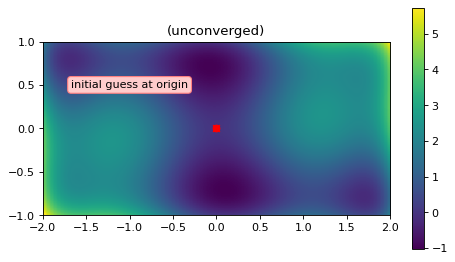

In [4]:
bounds, x0  = [(-2,2),(-1,1)], (0, 0)
optimal = optimize.minimize(f_opti, x0, bounds=bounds)

######################### plotting #########################

# function plot
plt.figure(figsize=(7, 4),dpi=80)
plt.imshow(f(X, Y), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
plt.title('(unconverged)')

# minimum plot
plt.scatter(x0[0], x0[1], color= 'r', marker = 'x', label = 'initial guess')
plt.scatter(optimal.x[0], optimal.x[1], color= 'r')
plt.text( -1, 0.5, "initial guess at origin", size=10, rotation=0.,
          ha="center", va="center",
          bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8), )
         )
plt.show()

#### 2. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

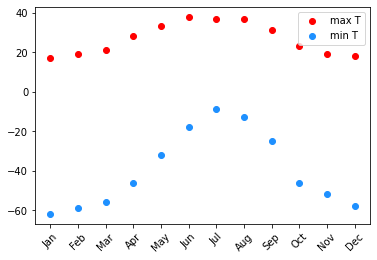

--- properties of the data ---
 MAX | average: 26.75 , delta: 21
 MIN | average: -39.666666666666664 , delta: 53


In [5]:
# populating variables
tmax = np.array([  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18 ])
tmin = np.array([ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58 ])
tmon = list( [ i[0:3] for i in calendar.month_name[1:] ] ) # -> label of months from Gen to Dec

# plotting the data
#plt.figure(figsize=(7, 4),dpi=80)
plt.scatter(tmon, tmax, label='max T', color='red')
plt.scatter(tmon, tmin, label='min T', color='dodgerblue')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print( '--- properties of the data ---')
print( ' MAX | average:', np.average(tmax), ', delta:', max(tmax)-min(tmax))
print( ' MIN | average:', np.average(tmin), ', delta:', max(tmin)-min(tmin))

tmax fit coefficients:  [27.62925851 10.63955648  5.72590566]
   with errors [0.30007995 0.40829058 0.07238013]
tmin fit coefficients:  [-37.71075225  25.20712456   6.15355893]
   with errors [0.98286082 1.35016698 0.09922634]


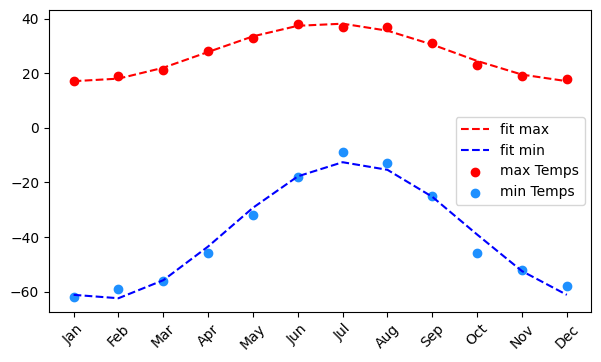

In [6]:
# fit a curve

# Observation: We should consider a 12-months periodic function, because it is reasonable that the temperature trend
#  repeats through the years, if we are not considering temperature fluctuations in the order of more years.
#  By looking at the data, a suitably cosine function should work.
def f_temps(x, average, amp, phase):  return ( average + amp*np.cos( 2*np.pi*(x - phase)/11 ) )
#  The period of the cosine function is fixed to be  '2pi/11'. The x values shall be provided as an array of int from 0 to 11.

fit_tmax, cov_tmax = optimize.curve_fit(f_temps, np.arange(12), tmax, p0 = [ np.average(tmax), (max(tmax)-min(tmax))/2, 6] )
fit_tmin, cov_tmin = optimize.curve_fit(f_temps, np.arange(12), tmin, p0 = [ np.average(tmin), (max(tmin)-min(tmin))/2, 6] )
# Observation: the initial parameters guess p0 are chosen by looking at reasonable properties of the input data:
#  - the y-shift parameter (average in f_temps) is the average temperature across the 12 months;
#  - the coefficient of the cosine function (amp) is half times the variation of temperature across 12 months;
#  - the x-shift parameter (phase in f_temps) is expected to be in order of 6 months, in order to place the highest temperatures in summer.

print( 'tmax fit coefficients: ', fit_tmax)
print( '   with errors', np.sqrt(np.diag(cov_tmax)))
print( 'tmin fit coefficients: ', fit_tmin)
print( '   with errors', np.sqrt(np.diag(cov_tmin)))

########### plotting ###########
plt.figure(figsize=(7, 4),dpi=100)

# fitted curves
plt.plot(tmon, f_temps(np.arange(12), *fit_tmax), 'r--', label='fit max' )
plt.plot(tmon, f_temps(np.arange(12), *fit_tmin), 'b--', label='fit min')
# original data
plt.scatter(tmon, tmax, label='max Temps', color='red')
plt.scatter(tmon, tmin, label='min Temps', color='dodgerblue')

plt.xticks(rotation=45)
plt.legend()
plt.show()

The above function is a reasonable fit for the temperature variations. Within the fit accuracy, the max and min temperatures are shifted in time of approximately 2 weeks. Indeed:

$$ phase_{max} = 5.73\pm 0.07$$
$$ phase_{min} = 6.15 \pm 0.10$$

$$ 	\Rightarrow shift = 0.42 \pm 0.17 $$

(values expressed in months).

#### 3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [7]:
# download the file
!wget -q -nc https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl

npdata = np.load('residuals_261.pkl', allow_pickle=True)
data = pd.DataFrame( npdata.item() ) # then we work with a Pandas DF
del npdata
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


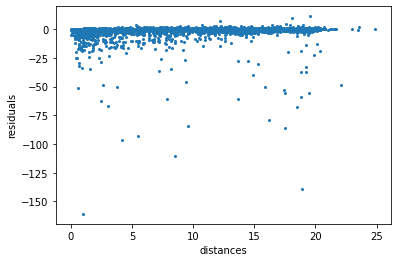

In [8]:
# initial plots, to show that there are large residual values
plt.scatter(data['distances'], data['residuals'], s=4)
plt.xlabel('distances'); plt.ylabel('residuals'); #plt.yscale('log');

We see that the residuals are mostly accumulated around 0, but they cover a large domain in negative values. The frequency plot of the whole domain leads to a narrow distribution, as can be seen in the following section.

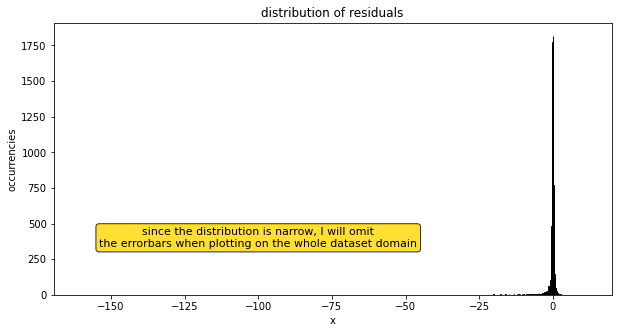

In [9]:
sel = data['residuals']

# creating the histogram
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(sel, bins=1600, facecolor='lightgrey', edgecolor='black')

# introducing the errorbars
y_error = np.sqrt(n)
#plt.errorbar( x=((bins[:-1] + bins[1:])/2), y=n, yerr=y_error, fmt='.', capsize=2, color='dimgrey', elinewidth=4)
plt.text( -100, 400, "since the distribution is narrow, I will omit\nthe errorbars when plotting on the whole dataset domain",
          size=11, rotation=0., ha="center", va="center", bbox=dict(boxstyle="round", facecolor='gold', alpha = 0.8) )
# histogram aesthetics
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of residuals')
plt.show()

fit: amp = 1741.1179952196637, mean = -0.08713687667966977, std = 0.22445495157051984


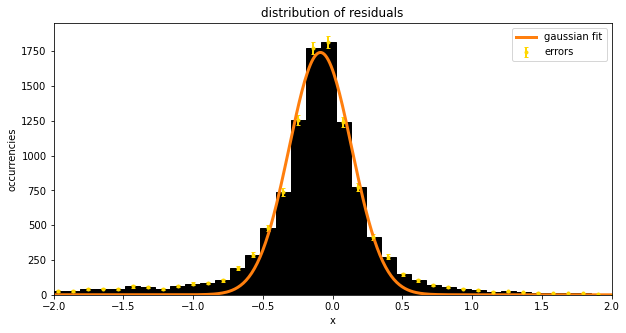

In [10]:
# plotting again the histogram
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(sel, bins=bins, facecolor='black', edgecolor='black')
y_error = np.sqrt(n)
plt.errorbar( x=((bins[:-1] + bins[1:])/2), y=n, yerr=y_error, fmt='.', capsize=2, color='gold', elinewidth=2, label='errors')

# fitting a gaussian
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

bins_half = [ (bins[i]+bins[i-1])/2 for i in range(1,len(bins)) ]
popt, pcov = optimize.curve_fit(gaussian, bins_half, n, p0=[1700,0,1], absolute_sigma = True)
print(f'fit: amp = {popt[0]}, mean = {popt[1]}, std = {popt[2]}')

# adding the gaussian
plt.plot(np.arange(-4,4,0.01), gaussian(np.arange(-4,4,0.01), *popt), label = 'gaussian fit', linewidth=3)

# histogram aesthetics
plt.xlim(-2,2)
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of residuals')
plt.legend()
plt.show()

In [11]:
# assume random counts, e.g. sigma_i = sqrt(y_i). This is not always the case!
mask = (y_error != 0)

sigma_y = y_error[mask]
x = [b for a, b in zip(mask, bins_half) if a]
y = n[mask]

ndof = len(n) - 1
print("n degrees of freedom =", ndof)

chi2 = np.sum( (y - gaussian(x, *popt) / sigma_y) ) # calculate the chi^2
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 
if pvalue < 0.05: print(' > fit is unsatisfactory!')
else: print(' > fit is satisfactory')

n degrees of freedom = 1599
chi2 = 10840.824544196465
p-value = 0.0
 > fit is unsatisfactory!


#### 4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [12]:
# download the file
!wget -q -nc https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

# import data file
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["time", "temp"]
data

,time,temp
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


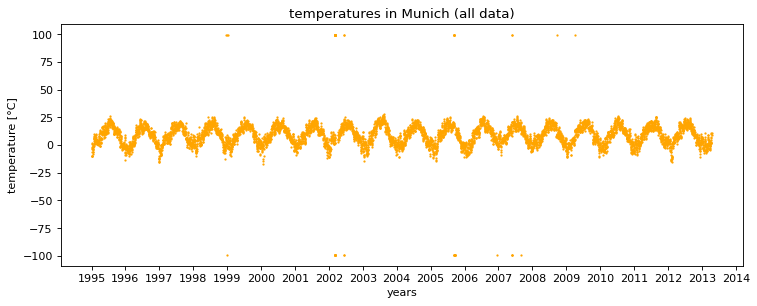

In [13]:
# plotting the whole dataset
plt.figure(figsize=(11, 4),dpi=80)
plt.scatter(data['time'], data['temp'], s=1, color='orange')
plt.title('temperatures in Munich (all data)')
plt.xlabel('years');  plt.ylabel('temperature [°C]');
plt.xticks(np.arange(1995, 2015, step=1));

f(t) fit coefficients:  [10.01800057  2.90071424  9.35102927]
   with errors [0.15576084 0.01554665 0.1101339 ]
g(t) fit coefficients:  [10.01999224  0.99956984  8.33477166  9.34683905]
   with errors [1.56367124e-01 1.74092827e-03 2.19922284e+01 1.11461799e-01]


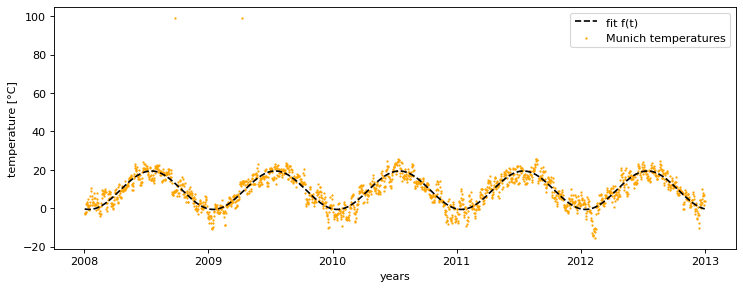

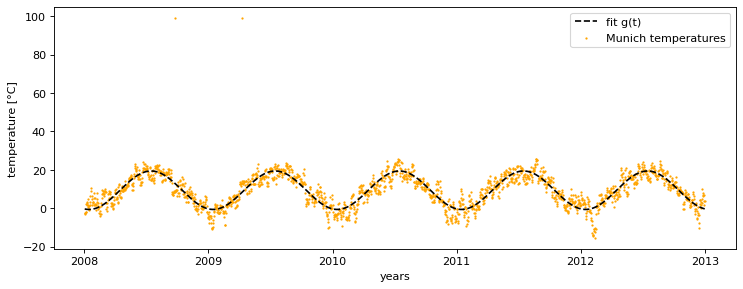

In [14]:
# selecting data of years 2008 to 2012
df = data[data['time'].between(2008, 2013)]

# the functions to fit
def ff(t, a, b, c):     return ( a*np.cos( (2*np.pi)*t + b) + c )
def fg(t, a, b, c, d):  return ( a*np.cos( (2*np.pi)*b*t + c) + d )

# performing the fit
fit_ff, cov_ff = optimize.curve_fit(ff, df['time'], df['temp'], p0=[10, np.pi, np.mean(df['temp'])])
fit_fg, cov_fg = optimize.curve_fit(fg, df['time'], df['temp'], p0=[10, 1, np.pi, np.mean(df['temp'])])

print( 'f(t) fit coefficients: ', fit_ff)
print( '   with errors', np.sqrt(np.diag(cov_ff)))
print( 'g(t) fit coefficients: ', fit_fg)
print( '   with errors', np.sqrt(np.diag(cov_fg)))

# plotting f(t)
plt.figure(figsize=(11, 4),dpi=80)
plt.scatter(df['time'], df['temp'], s=1, color='orange', label='Munich temperatures')
plt.plot(df['time'], ff(df['time'], *fit_ff), 'k--', label='fit f(t)')
plt.xlabel('years');  plt.ylabel('temperature [°C]');
plt.xticks(np.arange(2008, 2014, step=1));
plt.legend()
plt.show()

# plotting g(t)
plt.figure(figsize=(11, 4),dpi=80)
plt.scatter(df['time'], df['temp'], s=1, color='orange', label='Munich temperatures')
plt.plot(df['time'], fg(df['time'], *fit_fg), 'k--', label='fit g(t)')
plt.xlabel('years');  plt.ylabel('temperature [°C]');
plt.xticks(np.arange(2008, 2014, step=1));
plt.legend()
plt.show()

Answer to questions:
- The best fit values for $f(t)$ are $$a = 10.02 \pm 0.16 ,$$ $$b = 2.90 \pm 0.02,$$ $$c = 9.35 \pm 0.11.$$
- The average value of the temperature in Munich is represented by the parameter $c$. The average temperature in Munich is therefore $9.35 \pm 0.11 °C$. The same value is predicted also by the $g(t)$ model (see param. $d$). Because the model is a cosine function, the max and min temperature predicted across the year(s) are $c\pm a$, therefore $19.37 \pm 0.27 °C$ and $-0.67 \pm 0.27 °C$.
- Let us rewrite $f(t)$ in a more appealing form: $$ f(t) = a \cdot cos(2\pi t+b)+c = a \cdot cos[2\pi (t - b^*)]+c $$ where $b^* = -(b + 2k\pi)/{2\pi}$. The parameter $b^*$ would represent a shift in time of the fitting function. If $a>0$, $b^*$ is a time shift such that the maximum and minimum values of the cosine function fall in correspondence of the highest & minimum temperatures across the years. In other words, $b^*$ is a parameter required by our model to **align the fit function with the seasons (summer/winter) trend**. Let us do some back of an envelope calculations. We expect the highest temperatures to be placed somewhere around July; therefore $b* \simeq 7/12 \simeq 0.58$. In such case $b = 2k\pi -2\pi b^* = 2k\pi - 3.64$ for $k \in \mathbb{Z}$. For $k=1 \Rightarrow b=2.63$ which is close to our fit value $b = 2.90$.
Because of this observations, assuming $b^*=0.5$ ($\iff$ summer is placed around the middle of the year), I chose a starting parameter for the fit of $b=\pi$ (do the same math as before, with $k=1$).

- The F-test returns a value of 0.8 (see next section), which means that the additional parameter is **not necessary**.

In [15]:
# function for F-Test as defined in 08_fitting.ipynb
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

# f(t)
rss_ff = np.sum(( ff(df['time'], *fit_ff) - df['temp'] )**2)  # RSS on f(t)
ndof_ff = 3 - 1    # it is number of parameters - 1

# g(t) (function with additional parameter)
rss_fg = np.sum(( fg(df['time'], *fit_fg) - df['temp'] )**2)  # RSS on g(t)
ndof_fg = 4 - 1

print('RSS => for f(t): ', rss_ff, ', for g(t): ', rss_fg)
Ftest(rss_ff, rss_fg, ndof_ff, ndof_fg, len(df['time']), verbose=True)

RSS => for f(t):  40376.57222825893 , for g(t):  40375.27997681366
CL: 0.809 , additional parameter necessary: NO


0.8091551593226817

End of file